## Classification in Tensorflow
- Data: Pima Indians Diabetes Dataset
- tf.estimator API
- Categorical and Continous Features
- LinearClassifier and DNNClassifier

In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Data Cleaning

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### Feature Columns

In [9]:
import tensorflow as tf

### Continuous Features

* Number of times pregnant
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-Hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Conversion Continous -> Categorical

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

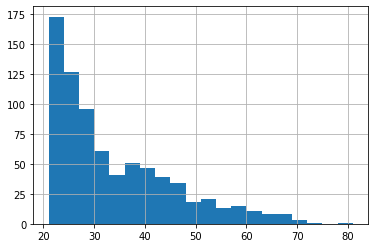

In [13]:
diabetes["Age"].hist(bins=20)

In [16]:
# continous to categories 
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [17]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [18]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null float64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 60.1+ KB


In [19]:
x_data = diabetes.drop('Class',axis=1)

In [20]:
labels = diabetes['Class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

### Input Functions

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\dilet\\AppData\\Local\\Temp\\tmpa1vceial', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000168FC0B8688>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\dilet\AppD

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [27]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-20T20:55:16Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmpa1vceial\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-20-20:55:17
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7322835, accuracy_baseline = 0.65748036, auc = 0.78560126, auc_precision_recall = 0.62634444, average_loss = 0.5318215, global_step = 1000, label/mean = 0.34251967, loss = 5.195487, precision = 0.63380283, prediction/mean = 0.34815267, recall = 0.51724136
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\dilet\AppData\Local\Temp\tmpa1vceial\model.ckpt-1000


In [28]:
results

{'accuracy': 0.7322835,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78560126,
 'auc_precision_recall': 0.62634444,
 'average_loss': 0.5318215,
 'label/mean': 0.34251967,
 'loss': 5.195487,
 'precision': 0.63380283,
 'prediction/mean': 0.34815267,
 'recall': 0.51724136,
 'global_step': 1000}

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [30]:
# Predictions is a generator! 
predictions = model.predict(pred_input_func)

In [31]:
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmpa1vceial\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.02879667], dtype=float32),
  'logistic': array([0.5071987], dtype=float32),
  'probabilities': array([0.49280134, 0.5071987 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.40862548], dtype=float32),
  'logistic': array([0.60075825], dtype=float32),
  'probabilities': array([0.39924175, 0.60075825], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.58793133], dtype=float32),
  'logistic': array([0.35710967], dtype=float32),
  'probabilities': array([0.64289033, 0.3571096 ], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1]),
  'all_classes': array([b'0', b'1'], dtype=object)}

## DNN Classifier

In [32]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\dilet\\AppData\\Local\\Temp\\tmpylgckh_b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000168FFF51748>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
# UH OH! AN ERROR. Check out the video to see why and how to fix.
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/feature_column/feature_column.py
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.


ValueError: Items of feature_columns must be a <class 'tensorflow.python.feature_column.feature_column_v2.DenseColumn'>. You can wrap a categorical column with an embedding_column or indicator_column. Given: VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [34]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [35]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [36]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [37]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\dilet\\AppData\\Local\\Temp\\tmp5fm33ngj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000168FED6F948>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [38]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\dilet\AppData\Local\Temp\tmp5fm33ngj\model.ckpt.
INFO:tensorflow:loss = 6.9212847, step = 1
INFO:tensorflow:global_step/sec: 430.395
INFO:tensorflow:loss = 5.061756, step = 101 (0.233 sec)
INFO:tensorflow:global_step/sec: 701.172
INFO:tensorflow:loss = 5.163851, step = 201 (0.145 sec)
INFO:tensorflow:global_step/sec: 668.334
INFO:tensorflow:loss = 4.5834856, step = 301 (0.152 sec)
INFO:tensorflow:global_step/sec: 664.023
INFO:tensorflow:loss = 3.9935527, step = 

In [39]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      y=y_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [40]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-20T20:57:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\dilet\AppData\Local\Temp\tmp5fm33ngj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-20-20:57:01
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7401575, accuracy_baseline = 0.65748036, auc = 0.7939982, auc_precision_recall = 0.6120424, average_loss = 0.52409095, global_step = 1000, label/mean = 0.34251967, loss = 5.119965, precision = 0.6179775, prediction/mean = 0.36760795, recall = 0.6321839
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\dilet\AppData\Local\Temp\tmp5fm33ngj\model.ckpt-1000


{'accuracy': 0.7401575,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7939982,
 'auc_precision_recall': 0.6120424,
 'average_loss': 0.52409095,
 'label/mean': 0.34251967,
 'loss': 5.119965,
 'precision': 0.6179775,
 'prediction/mean': 0.36760795,
 'recall': 0.6321839,
 'global_step': 1000}